In [48]:
from textblob.classifiers import DecisionTreeClassifier
from textblob.classifiers import NaiveBayesClassifier
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk import ngrams, FreqDist
import numpy as np

## 2.1.1 (3 points) Load one text file: pos_tweets.txt

In [2]:
fo = open("pos_tweets.txt", "r", encoding='utf-8')

In [3]:
mytext = fo.read()

In [4]:
print(mytext)

" I cheer myself up when I'm down by listening to my playlist called, Genius: Ballads and Cellos. I love my iPod and my taste of music."
" just watched the movie Wanted... it was pretty darn good."
" now I'm happy "
"--plotting like i'm mike..'game plan:pass the ball to lebron AT ALL TIMES and DONT FOUL'..certainly we'll win  haha..go cavs goooo!"
"@ mcdonalds with my litto sis aka cuzin lol cristyyyyy "
"@ PBnJen : Thanks for the great tour and making me even more excited to work in PR!  You Rock and so does S"
"@_Chelsea_Marie does target ship things to london? thanks so much! im such a demi fan shes amazing! "
"@adeline_sky  that sounds fantastic! You're amazing! We need to watch some Muse gigs too! Shall we do it Saturday night?"
"@adrianogarcia Ok, tend to use a dongle, but nice to know I could, even nicer to know iPhones can't  "
"@agallerylondon Hi! Great to see your tweet follow. Thanks!  How's the weekends for you?"
"@Alex_Jeffreys Welcome back. Emailed you earlier this mornin

## 2.1.2 (4 points) Tokenize sentences.

In [6]:
sentences = sent_tokenize(mytext)
length = len(sentences)

print('# of sentences: ', length)

print(sent_tokenize(mytext))


# of sentences:  749
['" I cheer myself up when I\'m down by listening to my playlist called, Genius: Ballads and Cellos.', 'I love my iPod and my taste of music."', '" just watched the movie Wanted... it was pretty darn good."', '" now I\'m happy "\n"--plotting like i\'m mike..\'game plan:pass the ball to lebron AT ALL TIMES and DONT FOUL\'..certainly we\'ll win  haha..go cavs goooo!"', '"@ mcdonalds with my litto sis aka cuzin lol cristyyyyy "\n"@ PBnJen : Thanks for the great tour and making me even more excited to work in PR!', 'You Rock and so does S"\n"@_Chelsea_Marie does target ship things to london?', 'thanks so much!', 'im such a demi fan shes amazing! "', '"@adeline_sky  that sounds fantastic!', "You're amazing!", 'We need to watch some Muse gigs too!', 'Shall we do it Saturday night?"', '"@adrianogarcia Ok, tend to use a dongle, but nice to know I could, even nicer to know iPhones can\'t  "\n"@agallerylondon Hi!', 'Great to see your tweet follow.', 'Thanks!', 'How\'s the we

## 2.1.3 (5 points) Tokenize words and remove punctuations.

In [8]:
tokenizer = nltk.RegexpTokenizer(r"\w+")
new_words = tokenizer.tokenize(mytext)

print("# of new words after tokenizing and punctuation removing: ", len(new_words))
print(new_words)

# of new words after tokenizing and punctuation removing:  8870
['I', 'cheer', 'myself', 'up', 'when', 'I', 'm', 'down', 'by', 'listening', 'to', 'my', 'playlist', 'called', 'Genius', 'Ballads', 'and', 'Cellos', 'I', 'love', 'my', 'iPod', 'and', 'my', 'taste', 'of', 'music', 'just', 'watched', 'the', 'movie', 'Wanted', 'it', 'was', 'pretty', 'darn', 'good', 'now', 'I', 'm', 'happy', 'plotting', 'like', 'i', 'm', 'mike', 'game', 'plan', 'pass', 'the', 'ball', 'to', 'lebron', 'AT', 'ALL', 'TIMES', 'and', 'DONT', 'FOUL', 'certainly', 'we', 'll', 'win', 'haha', 'go', 'cavs', 'goooo', 'mcdonalds', 'with', 'my', 'litto', 'sis', 'aka', 'cuzin', 'lol', 'cristyyyyy', 'PBnJen', 'Thanks', 'for', 'the', 'great', 'tour', 'and', 'making', 'me', 'even', 'more', 'excited', 'to', 'work', 'in', 'PR', 'You', 'Rock', 'and', 'so', 'does', 'S', '_Chelsea_Marie', 'does', 'target', 'ship', 'things', 'to', 'london', 'thanks', 'so', 'much', 'im', 'such', 'a', 'demi', 'fan', 'shes', 'amazing', 'adeline_sky', 'th

## 2.1.4 (4 points) Remove stop words.

In [12]:
stop_words = set(stopwords.words('english'))
filtered_words = [w for w in new_words if not w.lower() in stop_words]
filtered_words = []

for w in new_words:
    if w not in stop_words:
        filtered_words.append(w)
        
print(filtered_words)

['I', 'cheer', 'I', 'listening', 'playlist', 'called', 'Genius', 'Ballads', 'Cellos', 'I', 'love', 'iPod', 'taste', 'music', 'watched', 'movie', 'Wanted', 'pretty', 'darn', 'good', 'I', 'happy', 'plotting', 'like', 'mike', 'game', 'plan', 'pass', 'ball', 'lebron', 'AT', 'ALL', 'TIMES', 'DONT', 'FOUL', 'certainly', 'win', 'haha', 'go', 'cavs', 'goooo', 'mcdonalds', 'litto', 'sis', 'aka', 'cuzin', 'lol', 'cristyyyyy', 'PBnJen', 'Thanks', 'great', 'tour', 'making', 'even', 'excited', 'work', 'PR', 'You', 'Rock', 'S', '_Chelsea_Marie', 'target', 'ship', 'things', 'london', 'thanks', 'much', 'im', 'demi', 'fan', 'shes', 'amazing', 'adeline_sky', 'sounds', 'fantastic', 'You', 'amazing', 'We', 'need', 'watch', 'Muse', 'gigs', 'Shall', 'Saturday', 'night', 'adrianogarcia', 'Ok', 'tend', 'use', 'dongle', 'nice', 'know', 'I', 'could', 'even', 'nicer', 'know', 'iPhones', 'agallerylondon', 'Hi', 'Great', 'see', 'tweet', 'follow', 'Thanks', 'How', 'weekends', 'Alex_Jeffreys', 'Welcome', 'back', 'Em

## 2.1.5 (5 points) Calculate the word count or frequency.

In [22]:
freq_dist = FreqDist(filtered_words)
print(freq_dist.most_common(20))

[('I', 206), ('love', 56), ('good', 44), ('day', 40), ('new', 32), ('see', 30), ('Lakers', 30), ('great', 27), ('get', 27), ('http', 26), ('going', 25), ('got', 25), ('Taylor', 25), ('like', 24), ('go', 24), ('night', 24), ('time', 24), ('Swift', 24), ('today', 23), ('4', 23)]


## 2.1.6 (4 points) Draw a plot of frequency distribution

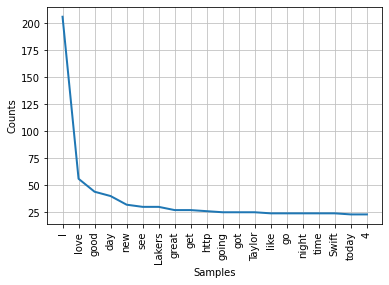

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [23]:
freq_dist.plot(20)

## 2.1.7 (5 points) Observe above outputs and plots. What can you find? Please explain.

## 2.2.1 (10 Points) Load two datasets.

In [32]:
pos_tweets = open("pos_tweets.txt", "r", encoding='utf-8')


new_pos_tweets = tuple(pos_tweets)
new_pos_tweets

('" I cheer myself up when I\'m down by listening to my playlist called, Genius: Ballads and Cellos. I love my iPod and my taste of music."\n',
 '" just watched the movie Wanted... it was pretty darn good."\n',
 '" now I\'m happy "\n',
 '"--plotting like i\'m mike..\'game plan:pass the ball to lebron AT ALL TIMES and DONT FOUL\'..certainly we\'ll win  haha..go cavs goooo!"\n',
 '"@ mcdonalds with my litto sis aka cuzin lol cristyyyyy "\n',
 '"@ PBnJen : Thanks for the great tour and making me even more excited to work in PR!  You Rock and so does S"\n',
 '"@_Chelsea_Marie does target ship things to london? thanks so much! im such a demi fan shes amazing! "\n',
 '"@adeline_sky  that sounds fantastic! You\'re amazing! We need to watch some Muse gigs too! Shall we do it Saturday night?"\n',
 '"@adrianogarcia Ok, tend to use a dongle, but nice to know I could, even nicer to know iPhones can\'t  "\n',
 '"@agallerylondon Hi! Great to see your tweet follow. Thanks!  How\'s the weekends for yo

In [33]:
neg_tweets = open("neg_tweets.txt","r", encoding = 'utf-8')

new_neg_tweets = tuple(neg_tweets)
new_neg_tweets

('" @iggigg too busy to see me in London this evening. What is a boy to do?"\n',
 '" cavs lost, and I got this sinking feeling we are going to lose Lebron in 2010 also...why must my home city SUCK? Ah well, LETS GO BROWNS!"\n',
 '" the closest BGT tour is Cardiff or London dam it why doesnt anybody other than the Chuckle Brothers tour the Westcountry?"\n',
 '" Why do other pet care people try to run others out of business? Or send suspicious e-mails fishing for info?"\n',
 '"-gasps- dananananaykroyd touring aussie ....  GRRR WHY ALWAYS SYDNEY AND MELBZ FFS"\n',
 '"....If i am going warsal that means no church in the morning if i dont go church but i think it imporant to see my nan coz she go cancer "\n',
 '"....wow the CAVS are sleeping ! I hate these blowout games "\n',
 '"...no more Lebron "\n',
 '"\'adawiyah is having fever.  hope the other 2 are not."\n',
 '"[-O] I wish the frogs weren\'t becoming extinct    http://tinyurl.com/cxe8w7"\n',
 '"@ Starbucks Windward Mall lovin the AC. 

In [35]:
all_tweets = new_pos_tweets + new_neg_tweets
all_tweets

('" I cheer myself up when I\'m down by listening to my playlist called, Genius: Ballads and Cellos. I love my iPod and my taste of music."\n',
 '" just watched the movie Wanted... it was pretty darn good."\n',
 '" now I\'m happy "\n',
 '"--plotting like i\'m mike..\'game plan:pass the ball to lebron AT ALL TIMES and DONT FOUL\'..certainly we\'ll win  haha..go cavs goooo!"\n',
 '"@ mcdonalds with my litto sis aka cuzin lol cristyyyyy "\n',
 '"@ PBnJen : Thanks for the great tour and making me even more excited to work in PR!  You Rock and so does S"\n',
 '"@_Chelsea_Marie does target ship things to london? thanks so much! im such a demi fan shes amazing! "\n',
 '"@adeline_sky  that sounds fantastic! You\'re amazing! We need to watch some Muse gigs too! Shall we do it Saturday night?"\n',
 '"@adrianogarcia Ok, tend to use a dongle, but nice to know I could, even nicer to know iPhones can\'t  "\n',
 '"@agallerylondon Hi! Great to see your tweet follow. Thanks!  How\'s the weekends for yo

In [36]:
import random

In [41]:
tweets_list = list(all_tweets)
random.shuffle(tweets_list)

In [56]:
new_all_tweets = tuple(tweets_list)
np.shape(new_all_tweets)

(2004,)

## 2.2.2: Split the data into a training set and a test set.

In [61]:
trainingData = new_all_tweets[0:1600]
testingData = new_all_tweets[1600:]

np.shape(trainingData)

(1600,)

In [60]:
np.shape(testingData)

(404,)

In [62]:
classifier = NaiveBayesClassifier(trainingData)

ValueError: too many values to unpack (expected 2)